In [47]:
import pandas as pd
import numpy as np

In [48]:
df1 = pd.read_excel("case_study1.xlsx")
df2 = pd.read_excel("case_study2.xlsx")


In [49]:
df1=df1.copy()
df2=df2.copy()


In [50]:
df1.shape

(51336, 26)

In [51]:
df2.shape

(51336, 62)

In [52]:
df1.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL'],
      dtype='object')

In [53]:
# remove nulls
df1 = df1.loc[df1['Age_Oldest_TL']!= -99999]

In [54]:
df1.shape

(51296, 26)

In [55]:
columns_to_be_remove = []
for i in df2.columns:
    if df2[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_remove.append(i)
columns_to_be_remove

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [56]:
df2.drop(columns=columns_to_be_remove,inplace=True,axis=1)

In [57]:
df2.shape

(51336, 54)

In [58]:
for i in df2.columns:
    df2 = df2[df2[i] != -99999]

In [59]:
df2.shape

(42066, 54)

In [60]:
df2.isna().sum()

PROSPECTID                    0
time_since_recent_payment     0
num_times_delinquent          0
max_recent_level_of_deliq     0
num_deliq_6mts                0
num_deliq_12mts               0
num_deliq_6_12mts             0
num_times_30p_dpd             0
num_times_60p_dpd             0
num_std                       0
num_std_6mts                  0
num_std_12mts                 0
num_sub                       0
num_sub_6mts                  0
num_sub_12mts                 0
num_dbt                       0
num_dbt_6mts                  0
num_dbt_12mts                 0
num_lss                       0
num_lss_6mts                  0
num_lss_12mts                 0
recent_level_of_deliq         0
tot_enq                       0
CC_enq                        0
CC_enq_L6m                    0
CC_enq_L12m                   0
PL_enq                        0
PL_enq_L6m                    0
PL_enq_L12m                   0
time_since_recent_enq         0
enq_L12m                      0
enq_L6m 

In [61]:
df1.isna().sum()

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

Checking Common Coln in both dataframe

In [62]:
for i in list(df1.columns):
    if i in df2.columns:
        print(i)

PROSPECTID


Merging Column

In [63]:
df = pd.merge(df1,df2,on='PROSPECTID',how='inner')

In [64]:
df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.00,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,650,P4
42060,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,others,others,702,P1
42061,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,1.0,0.0,1.000,0.0,0,0,ConsumerLoan,others,661,P3
42062,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,others,686,P2


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42064 entries, 0 to 42063
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          420

In [66]:
df.isna().sum().sum()

0

<AxesSubplot: >

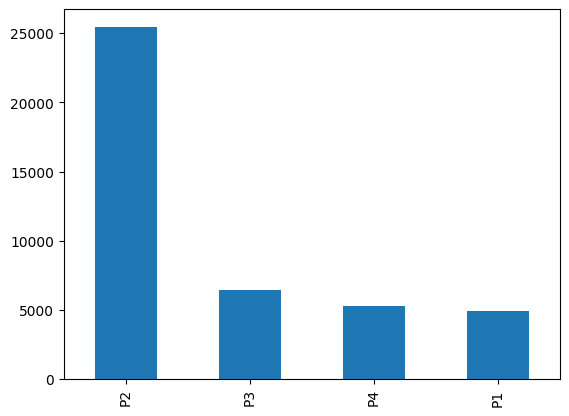

In [67]:
df['Approved_Flag'].value_counts().plot(kind='bar')

# Feature Selection

Check how many columns are categorical

In [68]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.0,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3


In [69]:
for i in df:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


Are these column associated with Approved_Flag(our target column)

We will check it through Chi sqaure test

Are these two Associated -- MARITALSTATUS vs Approved_Flag

1.
H0 : NULL HYPOTHESIS
NOT ASSOCIATED

________________________________________________
2.

H1: ALTERNATE HYPOTHESIS
ASSOCIATED
_____
3. 
Alpha (Assumed)
Significance level
strictness level
Margin of Error
ussually 5%


Less risky project = We can keep High value
More risky project = We Have to keep low value

------
4.
Confidence Interval 
= 1 - Alpha
In Our case 95

----

5.
CALCULATE THE EVIDENCE AGAINST H0
p-value
calculated using tests
T-test , Chi Square , Anova , Degree Of Freedom

T-test = Cat Vs Numerical ( 2 categories in Label Column  preciting cat , dog),
Anova =  Cat Vs Numerical ( >=3 categories in Label Column  preciting cat , dog , rat and more),
Chi Square = cat vs cat,

----
6.

p-value <= alpha :
    Reject H0

p-value <= aplha:
    Fail To Reject H0

Chi Square test cat vs cat

In [70]:
from scipy.stats import chi2_contingency

In [71]:
for i in ['MARITALSTATUS' , 'EDUCATION','GENDER' , 'last_prod_enq2' , 'first_prod_enq2' ]:
    chi2 , pval, _,_ = chi2_contingency(pd.crosstab(df[i],df['Approved_Flag']))
    print(i, '---',pval)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


Since all the categorical feature has pval <= 0.05 ,we will accept all the Feature

# Numerical Columns

In [72]:
numerical_column = []

for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numerical_column.append(i)

In [73]:
len(numerical_column)

72

# Anova Test Cat Vs Numerical ( >=3 categories in Label Column  preciting cat , dog , rat and more)

----

Multicollinearity vs Correlation



Multicollinearity = Predictability of each Feature by other features , Best to use
Variance Inflation Factor 

VIF Ranges from 1 from Infinity

VIF = 1 : No Muliticollinearity
VIF Between 1 and 5 : Low Multicollinearity
VIF Between 5 and 10 : Moderate Multicollinearity
VIF Above 10 : High Muliticollinearity

-----------------------------------------------------------------------------------



Correlation is specific to linear relationships between columns

In convex Fucntion (x^2 , -x^2), correlation gives misleading values



In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# Sequential VIF

vif_data = df[numerical_column]
total_column = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

In [76]:
for i in range(0,total_column):

    vif_value = variance_inflation_factor(vif_data,column_index)
    print(column_index,'---',vif_value)


    if vif_value <=6:
        columns_to_be_kept.append(numerical_column[i])
        column_index = column_index +1
    else:
        vif_data = vif_data.drop([numerical_column[i]],axis=1)

C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000327
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735


C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.8328007921530785
3 --- 6.0996533816467355
3 --- 5.581352009642762
4 --- 1.9855843530987785


C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


5 --- inf
5 --- 4.809538302819343
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.3843464059655854
7 --- 3.064658415523423
8 --- 2.898639771299252
9 --- 4.377876915347322
10 --- 2.2078535836958433
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721438


C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 --- inf
15 --- 7.380634506427232
15 --- 1.421005001517573
16 --- 8.083255010190323
16 --- 1.6241227524040114
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.825857047132431
18 --- 1.5080839450032664
19 --- 2.172088834824578
20 --- 2.623397553527229
21 --- 2.2959970812106167
22 --- 7.360578319196439
22 --- 2.1602387773102554
23 --- 2.8686288267891467
24 --- 6.458218003637277
24 --- 2.8474118865638265
25 --- 4.753198156284083
26 --- 16.22735475594825
26 --- 6.424377256363877
26 --- 8.887080381808687
26 --- 2.3804746142952653
27 --- 8.609513476514548
27 --- 13.06755093547673
27 --- 3.500040056654654
28 --- 1.908795587481377
29 --- 17.006562234161628
29 --- 10.730485153719197
29 --- 2.3538497522950275
30 --- 22.104855915136433
30 --- 2.7971639638512924
31 --- 3.424171203217696
32 --- 10.175021454450935
32 --- 6.408710354561301
32 --- 1.0011511962625619
33 --- 3.069197305397274
34 --- 2.8091261600643724
35 --- 20.249538381980678
35 --- 15.864576541593774
35 --- 1.8331649740532

In [77]:
len(columns_to_be_kept)

39

In [78]:
# we had 72 Numerical Feature to 39 Sequential VIF feature

ANOVA Check

In [79]:
from scipy.stats import f_oneway
columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group_p1 = [value for value,group in zip(a,b) if group == 'P1']
    group_p2 = [value for value,group in zip(a,b) if group == 'P2']
    group_p3 = [value for value,group in zip(a,b) if group == 'P3']
    group_p4 = [value for value,group in zip(a,b) if group == 'P4']

    f_statistics , p_value = f_oneway(group_p1,group_p2,group_p3,group_p4)

    if p_value<=0.05:
        columns_to_be_kept_numerical.append(i)


In [80]:
len(columns_to_be_kept_numerical)

37

In [81]:
feature = columns_to_be_kept_numerical + ['MARITALSTATUS' , 'EDUCATION','GENDER' , 'last_prod_enq2' , 'first_prod_enq2' ]
df = df[feature + ['Approved_Flag']]

In [82]:
for i in ['MARITALSTATUS' , 'EDUCATION','GENDER' , 'last_prod_enq2' , 'first_prod_enq2' ]:
    print(df[i].unique())

['Married' 'Single']
['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']
['M' 'F']
['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']
['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']


# LABEL ENCODING

Ordinal Feature -- Education

SSC - 1
12TH - 2
GRADUATE - 3
UNDER GRADUATE - 3
POST GRADUATE - 4
OTHERS - 1
PROFESSIONAL - 3


In [83]:
df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']] = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']] = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']] = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']] = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']] = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']] = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']] = 3

In [84]:
df['EDUCATION'] = df['EDUCATION'].astype('int')


C:\Users\uday.sharma\AppData\Local\Temp\ipykernel_19724\258128794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'] = df['EDUCATION'].astype('int')


# ONE HOT ENCODE

In [85]:
df_encoded = pd.get_dummies(df,columns=['MARITALSTATUS' ,'GENDER' , 'last_prod_enq2' , 'first_prod_enq2' ])

In [86]:
df_encoded.columns

Index(['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL',
       'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL',
       'Age_Newest_TL', 'time_since_recent_payment',
       'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever',
       'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag', 'EDUCATION',
       'Approved_Flag', 'MARITALSTATUS_Married', 'MARITALSTATUS_Single',
       'GENDER_F', 'GENDER_M', 'last_prod_enq2_AL', 'last_prod_enq2_CC',
       'last_prod_enq2_ConsumerLoan', 'last_prod_enq2_HL', 'last_prod_enq2_PL',
       'last_prod_enq2_others', 'first_prod_enq2_AL',

In [87]:
df_encoded.shape

(42064, 55)

In [88]:
df_encoded.to_excel("Final_excel.xlsx",index=False)

In [89]:
df.shape

(42064, 43)